# **Github Gary's**

# I. Introduction

We are the Github Gary's and we have set out to find the best neighborhood in Pittsburgh by measuring environmental differences between all the neighborhoods within Pittsburgh. We think that the health and quality of the environment is a substantial factor in a good neighborhood, and therefore we chose to analyze this metric.

# II. The Metric

Our metric of choice is environmental consciousness. In order to quantitatively measure this metric we chose datasets about the parks, trees, and smart trash containers throughout Pittsburgh neighborhoods.  All of the datasets used in our analysis are from the Western Pennsylvania Regional Data Center (WPRDC).

# III. Analysis

## **Trees**

# Sub Metric

For my sub metric, I am analyzing the value of trees in each neighborhood in Pittsburgh. The higher value a tree is, the more/better environmental benefits it will have. 

# ------------------------------------------------------------------------------------

# Determining the Best Neighborhood Through Data:

Import and logistics:

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
t = pd.read_csv("Trees/TreesData.csv", low_memory=False)
q = t['neighborhood'].unique()
w = len(t['neighborhood'].unique())

# ------------------------------------------------------------------------------------

## Data Analysis:

CO2 emissions are rising, and could have devestating effects like respiratory damage and disorders. For that reason, it is important that a neighborhood has good trees to sequester CO2. I made a loop that would add up, and average the value of all the trees within a neighborhood, for all the neighborhoods within Pittsburgh.


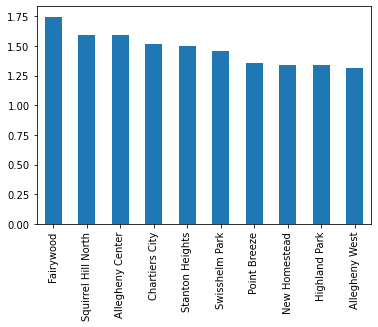

In [4]:
neighborhoodList=[]
averageCO2ValueList=[]
for a in q: 
    neighborhoodList.append(a)

for n in neighborhoodList:
    b = t['neighborhood'] == n
    bb = t[b]
    BBB = bb['co2_benefits_dollar_value'].mean()
    averageCO2ValueList.append(BBB)

allData = pd.Series(averageCO2ValueList, index=neighborhoodList)
CO2 = pd.Series(averageCO2ValueList, index=neighborhoodList)
allData.sort_values(ascending=False, inplace=True)
topTenData=allData.head(10)
topTenData.plot.bar()


This is the rankings for the highest average tree dollar Value by neighborhood (by CO2). The results are close, and there is no clear winner.

Not only that, Pittsburgh is known as the "Steel City" for its industrialism. As a result, the air we breath are polluted from these industries. On the bright side, trees remove pollutants like gasses and help improve air quality. Once again, a loop is established to sum, and average the value of trees when it comes to improving Air Quality. This is done for all neighborhoods within Pittsburgh.


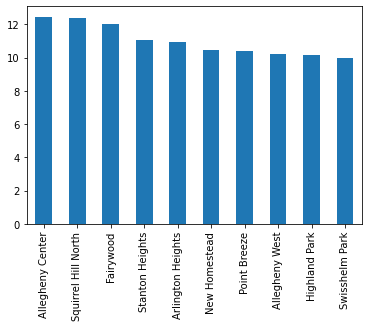

In [5]:
neighborhoodList=[]
averageAQValueList=[]
for a in q: 
    neighborhoodList.append(a)

for n in neighborhoodList:
    b = t['neighborhood'] == n
    bb = t[b]
    BBB = bb['air_quality_benfits_total_dollar_value'].mean()
    averageAQValueList.append(BBB)


allData6 = pd.Series(averageAQValueList, index=neighborhoodList)
AQ = pd.Series(averageAQValueList, index=neighborhoodList)
allData6.sort_values(ascending=False, inplace=True)
topTenData6=allData6.head(10)
topTenData6.plot.bar()



These are the rankings for the highest average Air Quality Dollar Value by neighborhood. Again, the data is very close, and there is no clear argument for a winner.

# ------------------------------------------------------------------------------------

### We are looking for the best neighborhood, so it is not enough to only have one or the other. Instead, we are looking for a neighborhood that excels in both. Therefore, I am averaging the previous two stats to find the best overall neighborhood.


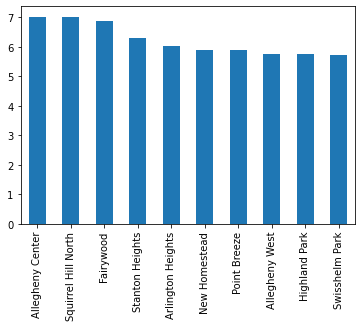

In [6]:
dataAddition = CO2+AQ
dataAddition.sort_values(ascending=False, inplace=True)
dataAddition = dataAddition/2
dataAddition
dataAddition10=dataAddition.head(10)
dataAddition10.head(10)
dataAddition10.plot.bar()


## The higher average value of trees, the more effictive those trees will be for the environment for that neighborhood. However, the top averages are extremely close and hard to tell.  

## Not only that, the current data only shows the average value of trees within a neighborhood. What does this mean? It means that the current amount of data does not take in the quantity of trees within a neighborhood. A neighborhood with ONE very good tree will beat out the average value of a neighborhood with thousands of trees, even though the latter will have a lot bigger impact on the environment.

## To compensate for this, I am multipling the average value of trees in a neighborhood by the quantity of trees in that neighborhood to find the total value of trees in the neighborhood. The higher the product, the better it is for the environment. 


In [7]:
tN = t.groupby(["neighborhood"])["neighborhood"].count()
tN.sort_values(ascending=False, inplace=True)
tN.head(5)
#Preview


neighborhood
Squirrel Hill South    5073
Highland Park          2941
Squirrel Hill North    2083
South Side Flats       1693
Shadyside              1558
Name: neighborhood, dtype: int64

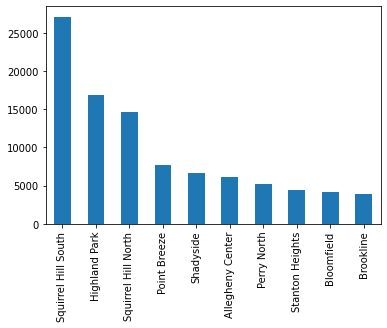

In [8]:
rankings = dataAddition*tN
rankings.sort_values(ascending=False, inplace=True)
top10Rankings = rankings.head(10)
top10Rankings.plot.bar()


# ------------------------------------------------------------------------------------

# Conclusion:
From the chart above, one neighborhood stands out way above the rest, so I can confidently declare Squirrel Hill South as THE best neighborhood in Pittsburgh according to my sub metric.
Being new to Pittsburgh, I don't really know much about other neighborhoods. But as a Pitt student, I would categorize North Oakland as my personal favorite neighborhood. Unfortunately from my data, the best neighborhood according to my submetric is not my personal favorite.

## **Parks**


My submetric is parks in Pittsburgh. In my analysis, the number, density, and quality of parks is used to determinine the best neighborhood in Pittsburgh. [The Parks dataset](https://data.wprdc.org/dataset/parks/resource/fa329e3d-89ff-4708-8ddf-81bfedcad11d), [the neighborhood areas dataset](https://data.wprdc.org/dataset/neighborhoods2), and the neighborhood populations dataset were obtained from the Western Pennsylvania Regional Data Center.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
parks = pd.read_csv("Parks.csv")
parks.head()

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907


In [3]:
neighborhoods = parks["neighborhood"].unique()
print(neighborhoods)

['Beechview' 'Crawford-Roberts' 'North Shore' 'Allegheny Center'
 'Central Business District' 'Central Northside' 'East Liberty'
 'Bedford Dwellings' 'South Side Slopes' 'South Side Flats'
 'Lower Lawrenceville' 'Banksville' 'South Oakland' 'Homewood North'
 'Hazelwood' 'Bon Air' 'Central Oakland' 'Brighton Heights' 'Brookline'
 'Spring Garden' 'Lincoln-Lemington-Belmar' 'Windgap' 'Troy Hill'
 'Westwood' 'Perry South' 'Homewood West' 'Squirrel Hill South'
 'Strip District' 'Arlington' 'Stanton Heights' 'Crafton Heights'
 'Upper Lawrenceville' 'East Carnegie' 'East Hills' 'Point Breeze'
 'Allentown' 'Duquesne Heights' 'Mount Washington' 'Esplen' 'Fairywood'
 'Fineview' 'Garfield' 'Greenfield' 'Larimer' 'Bloomfield' 'Perry North'
 'North Oakland' 'Hays' 'Elliott' 'Highland Park' 'Homewood South'
 'Morningside' 'Terrace Village' 'Spring Hill-City View' 'Carrick'
 'Central Lawrenceville' 'Lincoln Place' 'Manchester' 'Marshall-Shadeland'
 'Sheraden' 'Beltzhoover' 'Point Breeze North' 'Oakwo

In [4]:
print("There are " + str(parks["name"].size) + " parks listed in the dataset.")
print("There are " + str(len(neighborhoods)) + " neighborhoods listed in the Parks dataset.")
nbhdList = pd.read_csv("NeighborhoodList.csv")
print("There are a total of " + str(len(nbhdList["hood"])) + " neighborhoods in Pittsburgh.")

There are 209 parks listed in the dataset.
There are 73 neighborhoods listed in the Parks dataset.
There are a total of 90 neighborhoods in Pittsburgh.


Some of the entries in the Parks dataset are not actually parks. Some are listed as a traffic island, median, or building grounds. Since we are focusing on the environment, we only want to look at parks because they are outdoor spaces.

In [5]:
parks = parks[parks.type == "Park"]
print("There are 209 entires in the dataset, but " + str(len(parks.index)) + " of them are just parks.")

There are 209 entires in the dataset, but 153 of them are just parks.


In [6]:
parkCount = parks.groupby(by = "neighborhood").count()
parkCount = parkCount["id"].sort_values(ascending = False)
parkCount = parkCount.rename("parkCount")
parkCount

neighborhood
South Side Slopes    6
Beechview            6
Mount Washington     5
Hazelwood            5
Troy Hill            5
                    ..
Homewood West        1
Middle Hill          1
Morningside          1
New Homestead        1
Windgap              1
Name: parkCount, Length: 71, dtype: int64

Text(0, 0.5, 'Number of Parks')

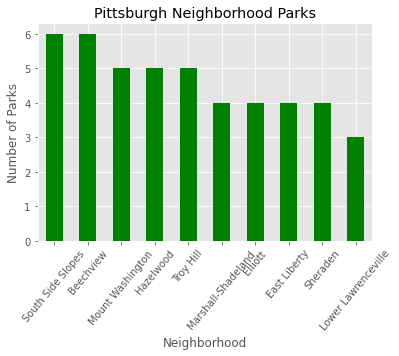

In [7]:
plt.style.use('ggplot')
parkCount.head(10).plot.bar(rot=50, color = "Green")
plt.title("Pittsburgh Neighborhood Parks")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Parks")

This is a graph of the top 10 Pittsburgh neighborhoods with the most parks. Now let's consider the density of the parks 
per total area of the neighborhood.

# Park Density by Area

In [8]:
areas = pd.read_csv("NeighborhoodList.csv")
areas = areas[["hood","acres"]]
areas = areas.rename(columns={"hood":"Neighborhood","acres":"Acres"})
areas.head(5)

,Neighborhood,Acres
0,Chateau,246.501
1,Summer Hill,282.104
2,Northview Heights,201.558
3,Spring Hill-City View,404.765
4,Perry South,581.656


In [9]:
areas = areas.sort_values('Neighborhood')
areas.head(5)

,Neighborhood,Acres
13,Allegheny Center,134.703
11,Allegheny West,90.841
62,Allentown,189.608
67,Arlington,302.320
71,Arlington Heights,84.592


In [10]:
parkCount = pd.DataFrame(parkCount)
parkCount = parkCount.sort_values(by="neighborhood")
parkCount.head(5)

,parkCount
neighborhood,
Allegheny Center,2
Allentown,2
Arlington,1
Banksville,2
Bedford Dwellings,1


In [11]:
parkCountArea = parkCount.merge(areas,how='inner',left_on="neighborhood",right_on="Neighborhood")
columns_titles = ["Neighborhood","parkCount","Acres"]
parkCountArea = parkCountArea.reindex(columns=columns_titles)
print(parkCountArea[parkCountArea["Neighborhood"]=="Perry North"].index.values)
parkCountArea.iat[47,2] = 700
parkCountArea.head(5)

[47]


,Neighborhood,parkCount,Acres
0,Allegheny Center,2,134.703
1,Allentown,2,189.608
2,Arlington,1,302.320
3,Banksville,2,622.919
4,Bedford Dwellings,1,115.252


Perry North did not contain an acreage in the dataset. It looks roughly the same size as Brighton Heights, which is 718 acres. I will assign an estimate of 700 acres to Perry North. Since it will end up towards the bottom of our ranking list, the exact acreage is not needed.

In [12]:
parkCountArea["Parks per Acre"] = parkCountArea['parkCount']/parkCountArea['Acres']
parkCountArea.head(5)

,Neighborhood,parkCount,Acres,Parks per Acre
0,Allegheny Center,2,134.703,0.014847
1,Allentown,2,189.608,0.010548
2,Arlington,1,302.320,0.003308
3,Banksville,2,622.919,0.003211
4,Bedford Dwellings,1,115.252,0.008677


In [13]:
parkCountArea = parkCountArea.sort_values("Parks per Acre",ascending = False)
parkCountArea['Rank'] = np.arange(len(parkCountArea))
parkCountArea.head(10)

,Neighborhood,parkCount,Acres,Parks per Acre,Rank
40,Marshall-Shadeland,4,148.209,0.026989,0
64,Troy Hill,5,247.170,0.020229,1
18,Crawford-Roberts,3,166.101,0.018061,2
39,Manchester,3,179.566,0.016707,3
45,North Shore,3,195.014,0.015384,4
0,Allegheny Center,2,134.703,0.014847,5
55,South Side Slopes,6,460.632,0.013026,6
26,Fineview,2,160.488,0.012462,7
15,Central Northside,2,166.475,0.012014,8
66,Upper Lawrenceville,3,260.349,0.011523,9


Text(0, 0.5, 'Number of Parks per Acre')

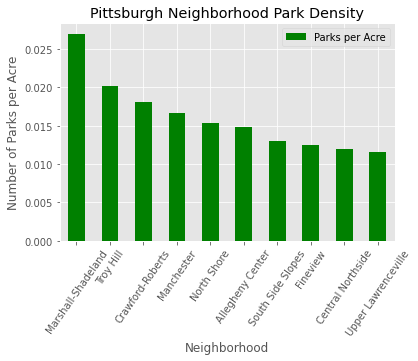

In [14]:
plt.style.use('ggplot')
parkCountArea[["Neighborhood","Parks per Acre"]].head(10).plot.bar(rot=55, color = "Green",x='Neighborhood',y="Parks per Acre")
plt.title("Pittsburgh Neighborhood Park Density")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Parks per Acre")

Here are the top ten neighborhoods in parks per acre density. This means these neighborhoods have the most parks compared to their size, so it will take less distance to visit them. Having more parks per acre means there is more area reserved for outdoor spaces compared to roads and buildings. This contributes to the neighborhood having a higher quality environment.

# Parks Density by Population

In [15]:
pops = pd.read_csv("NeighborhoodPopulations.csv")
pops = pops[["Neighborhood","2020_Total_Population"]]
pops.head(5)

,Neighborhood,2020_Total_Population
0,Allegheny Center,1419
1,Allegheny West,540
2,Allentown,2305
3,Arlington - Arlington Heights (Combined),2040
4,Banksville,4127


In [16]:
pops = pops.sort_values('Neighborhood')
parkCount = pd.DataFrame(parkCount)
parkCount = parkCount.sort_values(by="neighborhood")
parkCountPop = parkCount.merge(pops,how='inner',left_on="neighborhood",right_on="Neighborhood")
columns_titles = ["Neighborhood","parkCount","2020_Total_Population"]
parkCountPop = parkCountPop.reindex(columns=columns_titles)
parkCountPop.head(5)

,Neighborhood,parkCount,2020_Total_Population
0,Allegheny Center,2,1419
1,Allentown,2,2305
2,Banksville,2,4127
3,Bedford Dwellings,1,1386
4,Beechview,6,7596


In [17]:
parkCountPop["Parks per Person"] = parkCountPop['parkCount']/parkCountPop['2020_Total_Population']
parkCountPop.head(5)

,Neighborhood,parkCount,2020_Total_Population,Parks per Person
0,Allegheny Center,2,1419,0.001409
1,Allentown,2,2305,0.000868
2,Banksville,2,4127,0.000485
3,Bedford Dwellings,1,1386,0.000722
4,Beechview,6,7596,0.000790


In [18]:
parkCountPop = parkCountPop.sort_values("Parks per Person",ascending = False)
parkCountPop['Rank'] = np.arange(len(parkCountPop))
parkCountPop

,Neighborhood,parkCount,2020_Total_Population,Parks per Person,Rank
43,North Shore,3,301,0.009967,0
64,West End,1,205,0.004878,1
27,Hays,1,321,0.003115,2
22,Esplen,1,322,0.003106,3
54,Spring Garden,2,786,0.002545,4
...,...,...,...,...,...
56,Squirrel Hill South,3,15317,0.000196,63
47,Point Breeze,1,5348,0.000187,64
7,Bluff,1,5882,0.000170,65
10,Brookline,2,13063,0.000153,66


Text(0, 0.5, 'Number of Parks per Person')

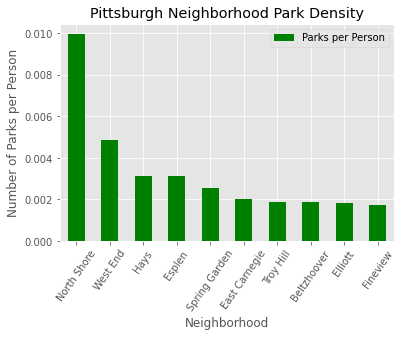

In [19]:
plt.style.use('ggplot')
parkCountPop[["Neighborhood","Parks per Person"]].head(10).plot.bar(rot=55, color = "Green",x='Neighborhood',y="Parks per Person")
plt.title("Pittsburgh Neighborhood Park Density")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Parks per Person")

Here are the top ten neighborhoods in parks per person. This means these neighborhoods have the most parks compared to their population, so there will be more parks per residence. Having more parks per person means there is more area reserved for outdoor spaces because of there is a higher density of parks when compared to the space that residences would take up. This contributes to the neighborhood having a higher quality environment.

# Combining the two density submetrics

In [20]:
parkCountArea = parkCountArea.sort_values('Neighborhood')
parkCountPop = parkCountPop.sort_values('Neighborhood')
mergedRanks = parkCountArea.merge(parkCountPop,left_on="Neighborhood",right_on="Neighborhood")
mergedRanks = mergedRanks[["Neighborhood","Rank_x","Rank_y"]]
mergedRanks = mergedRanks.rename(columns={"Rank_x":"Area Rank","Rank_y":"Population Rank"})
mergedRanks

,Neighborhood,Area Rank,Population Rank
0,Allegheny Center,5,12
1,Allentown,16,25
2,Banksville,55,47
3,Bedford Dwellings,21,33
4,Beechview,31,29
...,...,...,...
63,Upper Lawrenceville,9,17
64,West End,23,1
65,West Oakland,26,52
66,Westwood,42,38


In [21]:
mergedRanks["Average Rank"] = (mergedRanks["Area Rank"] + mergedRanks["Population Rank"]/5)/2
mergedRanks

,Neighborhood,Area Rank,Population Rank,Average Rank
0,Allegheny Center,5,12,3.7
1,Allentown,16,25,10.5
2,Banksville,55,47,32.2
3,Bedford Dwellings,21,33,13.8
4,Beechview,31,29,18.4
...,...,...,...,...
63,Upper Lawrenceville,9,17,6.2
64,West End,23,1,11.6
65,West Oakland,26,52,18.2
66,Westwood,42,38,24.8


When combining the ranks to an average rank, I weighted the Population Rank less by dividing it by 5. This is because density of parks per acre is a much better measurement of the quality of the environment compared to parks per person.

In [22]:
mergedRanks = mergedRanks.sort_values(by="Average Rank")
mergedRanks = mergedRanks[["Neighborhood","Average Rank"]]
mergedRanks

,Neighborhood,Average Rank
61,Troy Hill,1.1
43,North Shore,2.0
38,Marshall-Shadeland,2.1
16,Crawford-Roberts,2.5
37,Manchester,2.6
...,...,...
56,Squirrel Hill South,38.3
12,Central Lawrenceville,38.7
47,Point Breeze,39.9
10,Brookline,40.6


Text(0, 0.5, 'Average Ranking')

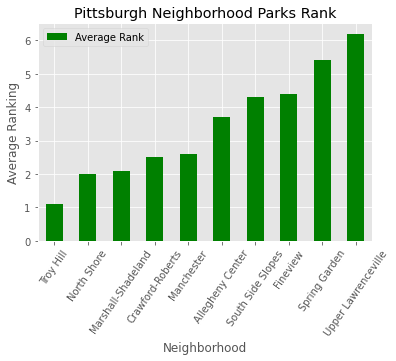

In [23]:
plt.style.use('ggplot')
mergedRanks[["Neighborhood","Average Rank"]].head(10).plot.bar(rot=55, color = "Green",x='Neighborhood',y="Average Rank")
plt.title("Pittsburgh Neighborhood Parks Rank")
plt.xlabel("Neighborhood")
plt.ylabel("Average Ranking")

This graph shows the average ranking of Pittsburgh neighborhoods between the metrics of parks per acre and parks per person. A lower ranking value is better because it means the neighborhood placed higher on the list.

# Conclusion

When considering the metric of both park density by area and by population, **Troy Hill** has the highest parks ranking from my analysis.

However, it is important to note that there many flaws in this data and this analysis:
1. The parks dataset only contains 73 out of 90 Pittsburgh neighborhoods.
2. The final ranking list contains less neighborhoods, at 68.
3. There are only 153 usable entries in this dataset, spread across 73 neighborhoods, which means many neighborhoods end up with 1 or 2 parks, and thus are easily skewed.
4. The size, quality, and construction of the parks are important to consider. For example, Schenley Park is clearly a much better and more expansive park than something like Able Long Park, which is merely a playground. In order to combat this flaw, it would be necessary to consider each of the 153 parks individually, rate them, and then use that data in this analysis. However, that is obviously unfeasible and unsuited for the nature of this project.
5. The area density of the parks would make more sense if the areas of the parks were included, not just the quantity.

Personally, my favorite neighborhood in Pittsburgh would be Shadyside, but unfortunately it did not make the top ten in this metric.

# C. **Smart Trash Containers**

Smart trash containers throughout Pittsburgh is a valuable metric for determining environmental consciousness because there is likely a positive correlation between more smart trash containers and better neighborhood environmental consciousness because a neighborhood with more smart trash containers is likely to have less trash in the streets. Also, a neighborhood that values the environment will likely naturally have more smart trash containers. The best neighborhood is determined for this metric based on the neighborhood with the most smart trash containers.  

In [1]:
# importing modules
import pandas as pd
import plotly as px

# reading data
df = pd.read_csv("Trash/trash_data.csv")

# data manipulation
df_neighborhoods = df.groupby(["neighborhood"])["neighborhood"].count()
df_neighborhoods = df_neighborhoods.to_frame()
df_neighborhoods = df_neighborhoods.rename(columns={"neighborhood":"count"})


In [2]:
# grouping and sorting
df_neighborhoods.sort_values(by="count", ascending=False, inplace=True)
df_neighborhoods

,count
neighborhood,
Shadyside,76
East Liberty,62
Bloomfield,58
North Shore,53
South Side Flats,53
...,...
Oakwood,1
East Carnegie,1
South Shore,1


In [3]:
# getting top 10 neighborhoods
df_top_10_trash = df_neighborhoods.head(10)
df_top_10_trash

,count
neighborhood,
Shadyside,76
East Liberty,62
Bloomfield,58
North Shore,53
South Side Flats,53
Squirrel Hill South,51
Strip District,41
Carrick,36
Central Oakland,32


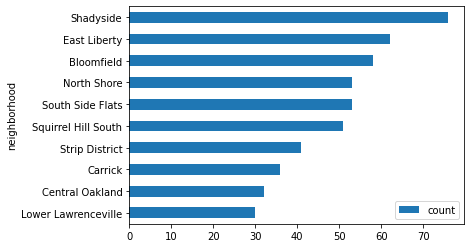

In [4]:
# Plotting results
ax = df_top_10_trash.plot.barh()
ax.invert_yaxis()

Based on the data analysis of smart trash containers presented above, the best neigborhood based on quantity of smart trash containers is Shadyside, with East Liberty being the second best neighborhood.

# IV. Conclusion

When comparing the results of our three submetrics, trees, parks, and trash, we assign weights to the submetrics based on the quality of the dataset and how insightful the results are. Considering the size of each dataset is important. Performing a quantitative analysis with code with a larger dataset will yield more accurate results.

1. Trees dataset - **45709 entries**
2. Parks dataset - **153 entries**
3. Trash dataset - **1108 entries**

Thus, the trees rankings will be valued the most, with trash rankings second and parks rankings third.

Across our rankings, we see that **Squirrel Hill South** places #1 for Trees and #6 for Trash. Although it doesn't make the top 10 in Parks, Squirrel Hill South places very high in Trees and Trash, which have more conclusive data.

Thus, we can conclude that **Squirrel Hill South** is the best neighborhood based on the metric of environmental quality.